# Lab 1 Report: 
## Data Preparation Techniques for Machine Learning

### Name: 

In [215]:
# Import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
from IPython.display import Image # For displaying images in colab jupyter cell

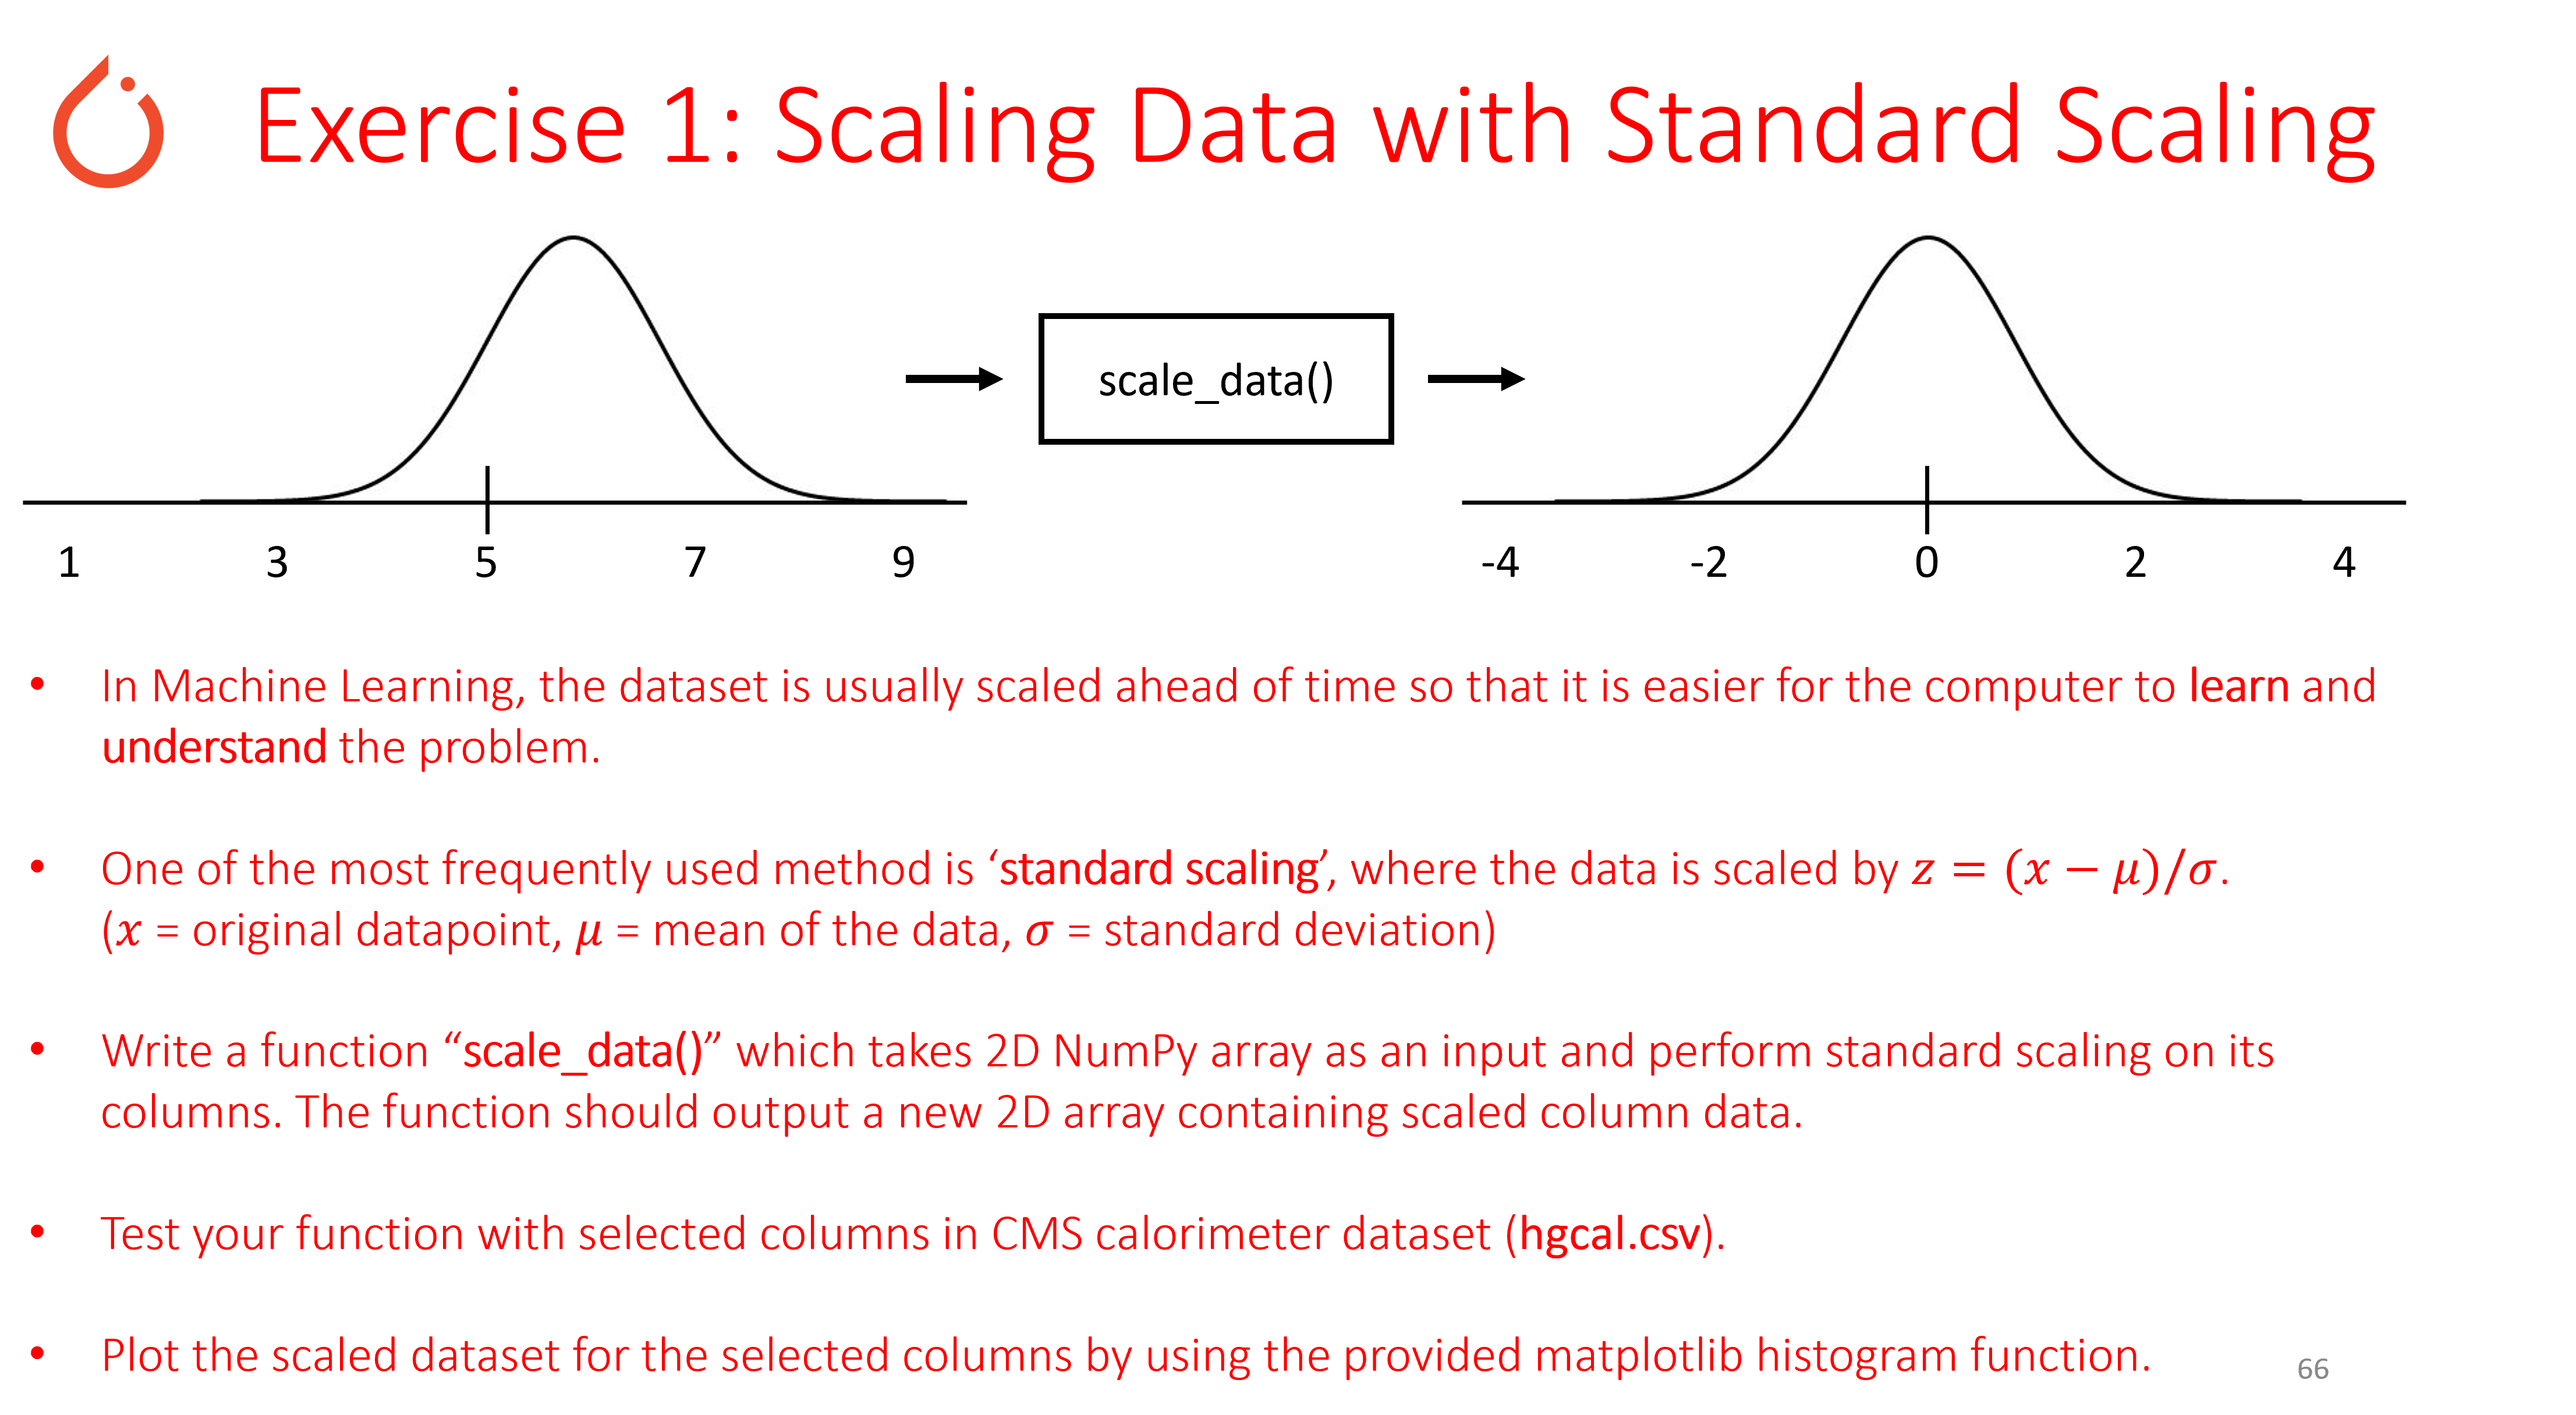

In [4]:
Image('lab1_exercise1.PNG', width = 1000)

In [5]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)

Unnamed: 0          x           y           z     eta       phi    energy  \
0           0  179.50383  -23.632137   -7.878280 -0.0435 -0.130900  0.200126   
1           1 -143.63881  110.217940  -72.706795 -0.3915  2.487094  2.734594   
2           2  179.50383  -23.632120 -146.429610 -0.7395 -0.130900  0.423910   
3           3 -172.67310   54.443620 -238.065340 -1.0875  2.836160  0.713950   
4           4 -180.88046    7.897389 -238.065340 -1.0875  3.097959  0.000000   
5           5 -180.88045   -7.897438 -238.065340 -1.0875 -3.097959  0.034491   
6           6 -152.69838  -97.279590 -265.020540 -1.1745 -2.574361  0.580138   
7           7  -23.63213  179.503810 -325.172060 -1.3485  1.701696  0.411487   
8           8 -152.69835   97.279594   89.977780  0.4785  2.574361  0.183141   
9           9 -176.76110   39.187016  107.930240  0.5655  2.923426  0.337551   

   trackId  
0   462412  
1   493395  
2        1  
3   493640  
4   495225  
5   495225  
6   460126  
7   465028  
8     1383  
9     4421

In [13]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [89]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub. 
# The array should have dimension 420 (rows) x 6 (columns)

# YOUR CODE HERE
# method1 1
CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7]
print(CMS_calori_dataset_np_sub.shape)

# method 2
CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, [1]]
for i in range(2,7):
    subset = CMS_calori_dataset_np[:, [i]]
    CMS_calori_dataset_np_sub = np.hstack([CMS_calori_dataset_np_sub, subset])

print(CMS_calori_dataset_np_sub.shape)
# CMS_calori_dataset_np_sub

(420, 6)
(420, 6)


In [81]:
# Create the scaling function

def scale_data(arr):
    
    # YOUR CODE HERE
    scaled_data = arr
    row = arr.shape[0]
    column = arr.shape[1]
    for i in range(0,column):
        subset = arr[:, [i]]
        m = np.mean(subset)
        s = np.std(subset)
        for j in range(0, row):
            scaled_data[j, i] = (arr[j, i] - m) / s
        
    return scaled_data

In [82]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

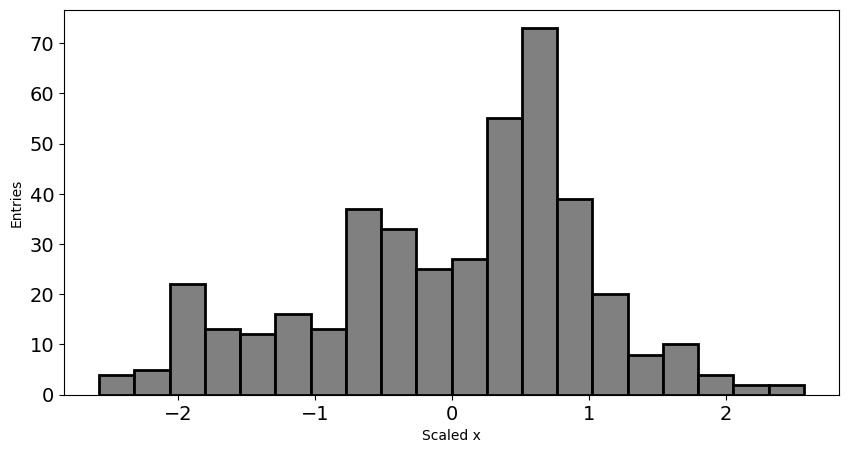

In [83]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

# YOUR CODE HERE
plt.xlabel('Scaled x')
plt.ylabel('Entries')

plt.show()

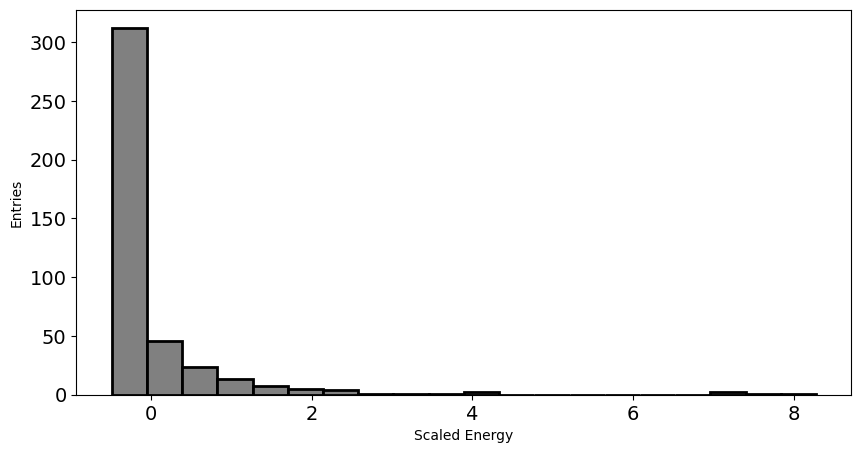

In [115]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

# YOUR CODE HERE 
plt.xlabel('Scaled Energy')
plt.ylabel('Entries')

plt.show()

### Expected histogram outputs - Feel free to style your plot differently

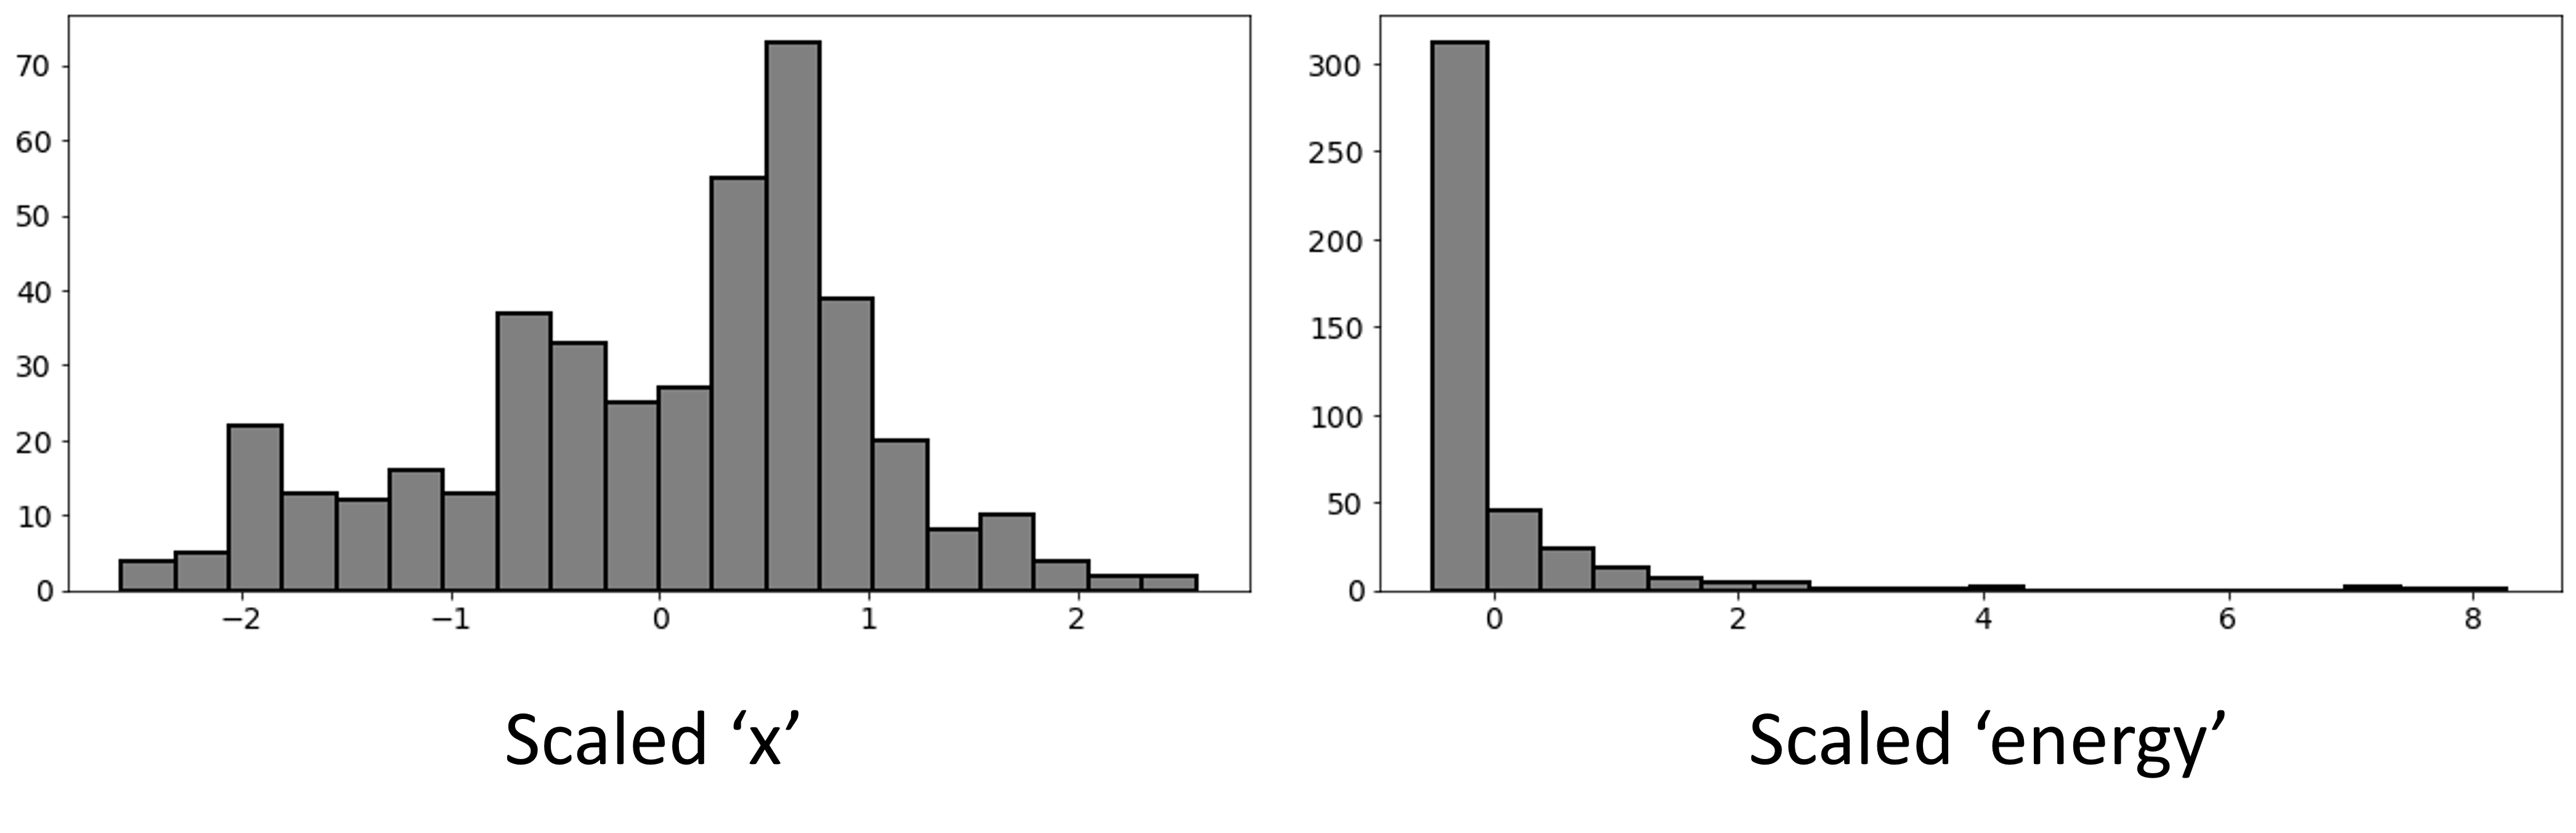

In [116]:
Image('lab1_e1_expected_outputs.PNG', width = 1000)

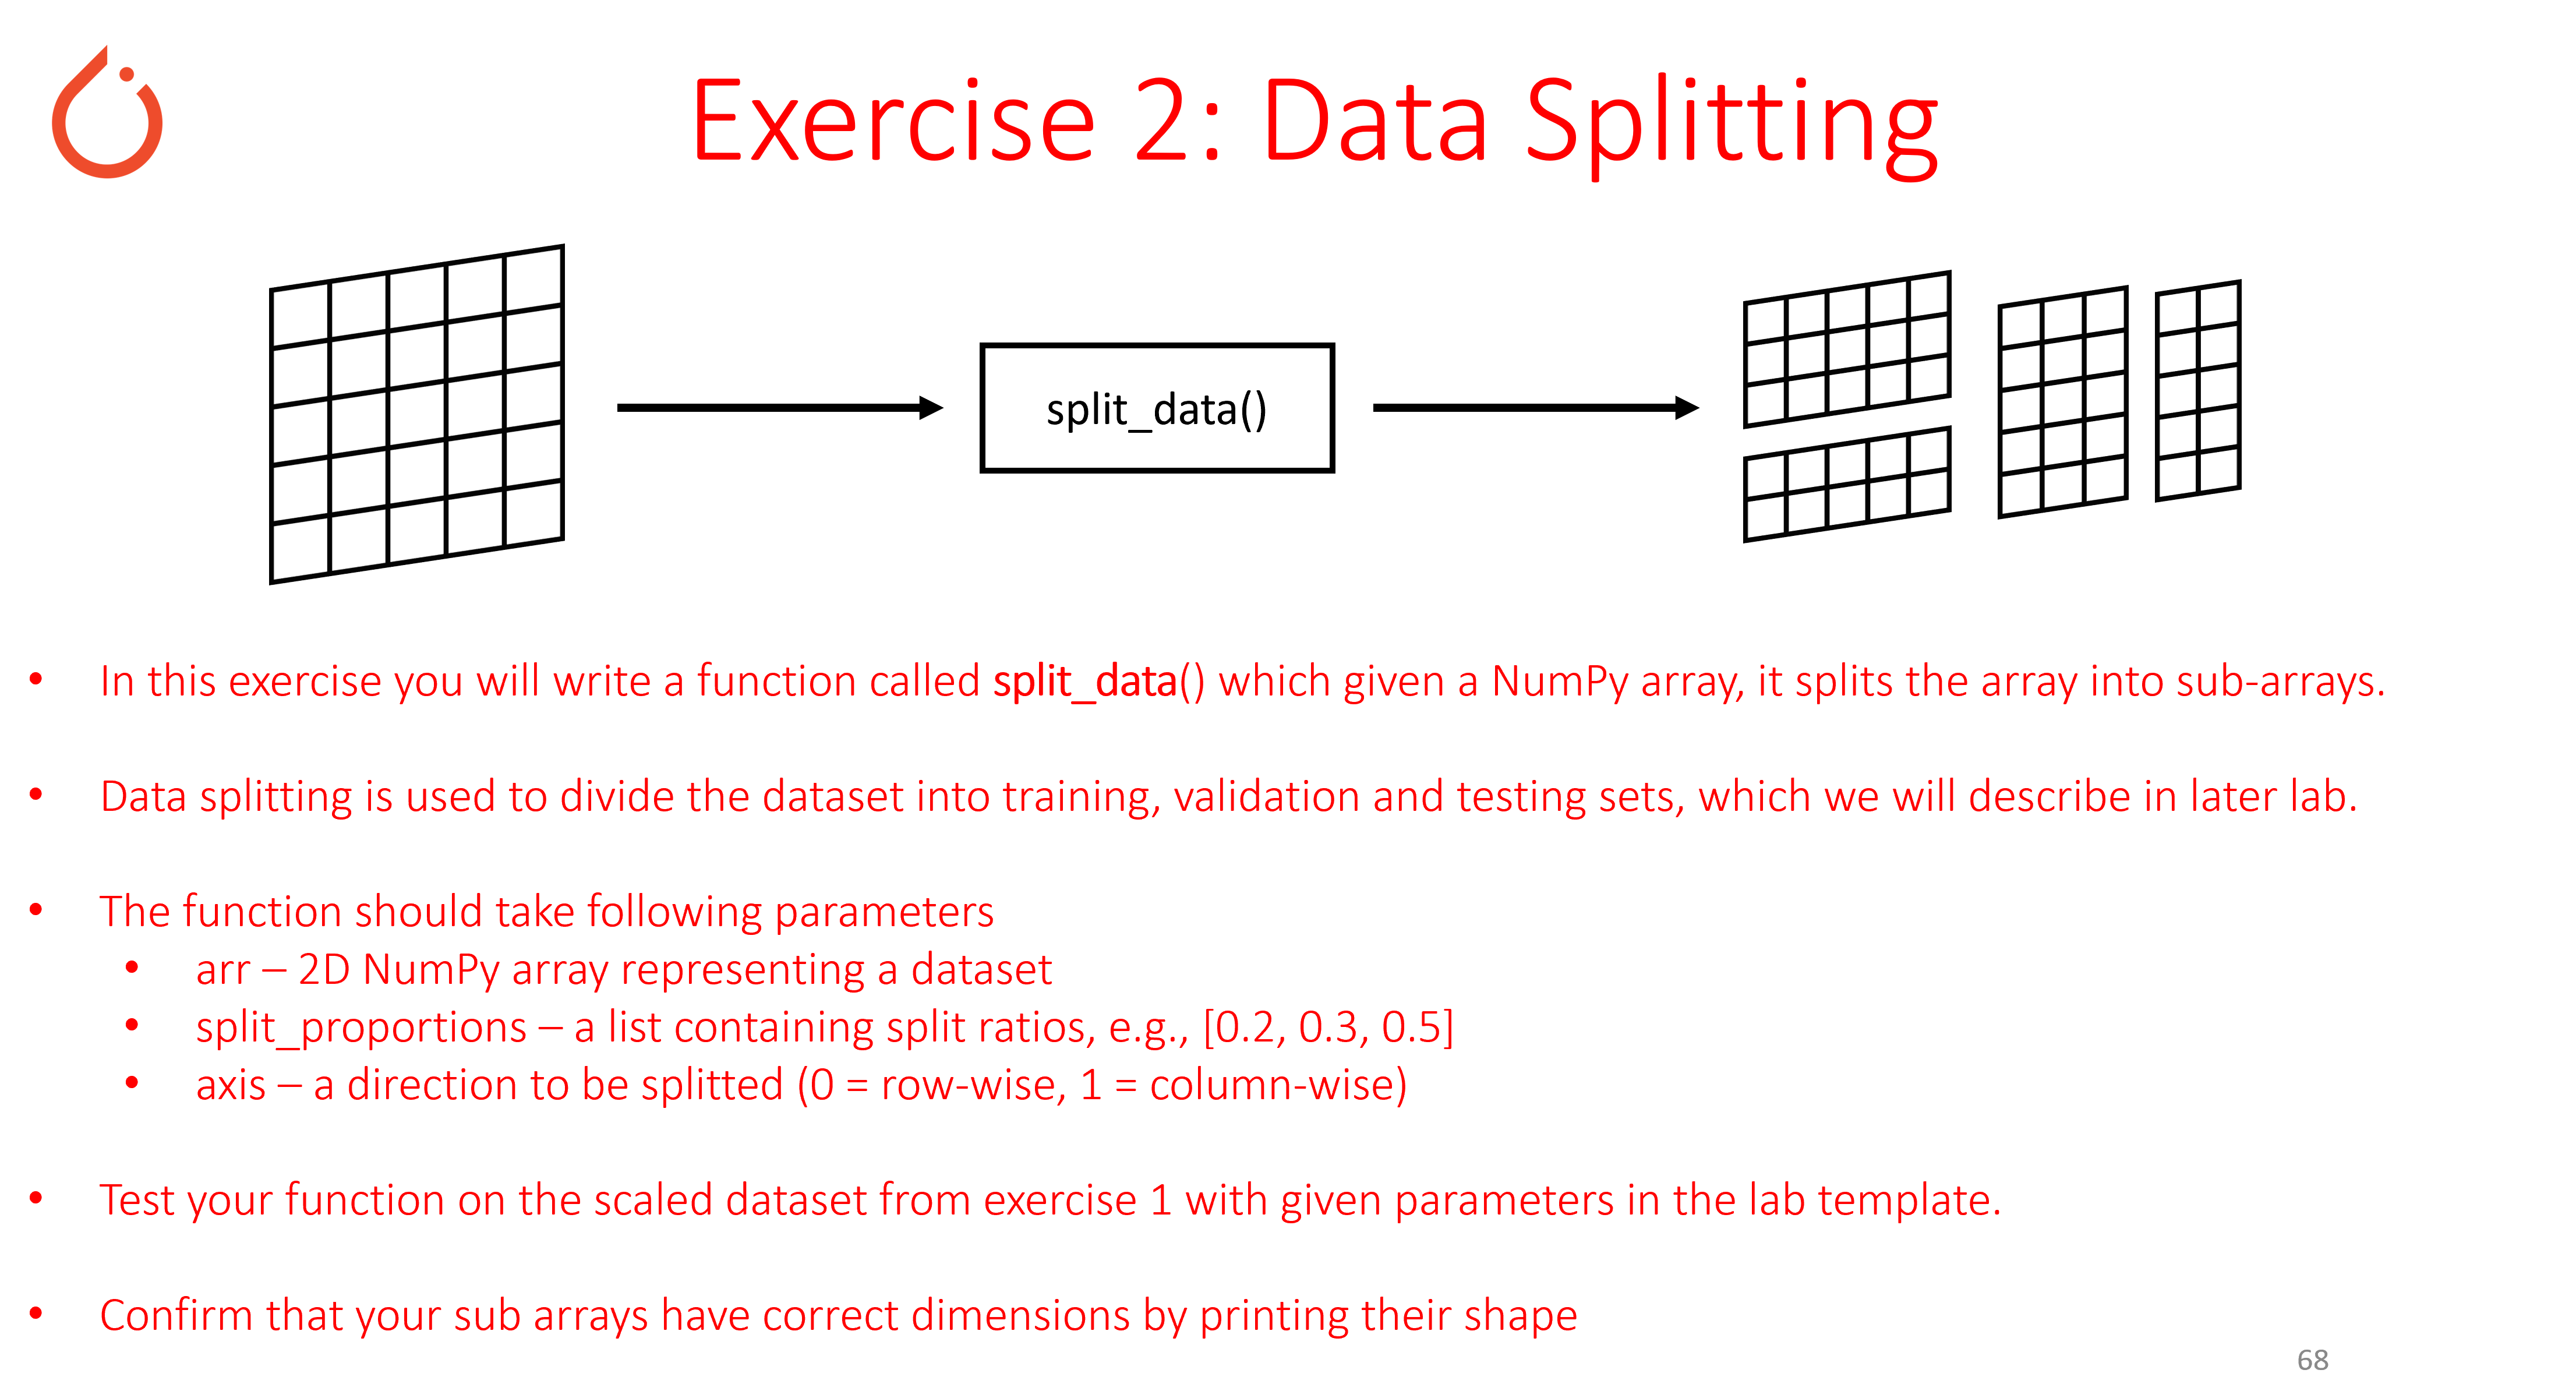

In [117]:
Image('lab1_exercise2.PNG', width = 1000)

In [210]:
# Create the splitting function

def split_data(arr, split_proportions, axis):
    
    # YOUR CODE HERE
    # Returns a list of numpy sub-arrays according to split proportions
    # print(arr.shape)
    if axis == 0:
        sections = arr.shape[0]
    elif axis == 1:
        sections = arr.shape[1]
    else:
        print("Wrong axis input")

    split_sections = np.arange(len(split_proportions))
    for i in range(0, len(split_proportions)):
        tmp = 0
        for j in range(0, i+1):
            tmp += int(split_proportions[j]*sections)
        split_sections[i] = int(tmp)
   
    # print(split_sections)
    split_data_list = np.split(arr, split_sections, axis)
    
    return split_data_list

In [211]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                    split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [212]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)
print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [213]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                                split_proportions = [0.5, 0.5], axis = 1)

In [214]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)
